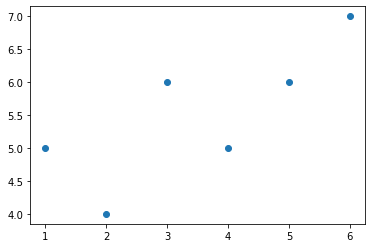

In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

xs = [1,2,3,4,5,6]
ys = [5,4,6,5,6,7]

plt.scatter(xs, ys)
plt.show()

In [2]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

def best_fit_slope(xs, ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) /
        ((mean(xs)*mean(xs)) - mean(xs*xs)))
    return m

m = best_fit_slope(xs,ys)

print(m)

0.42857142857142866


# How to program the Best Fit Line

In [3]:
def best_fit_slope_and_intercept(xs,ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) / 
          ((mean(xs) * mean(xs)) - mean(xs*xs)) )
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)
print(m,"\n",b)

0.42857142857142866 
 4.0


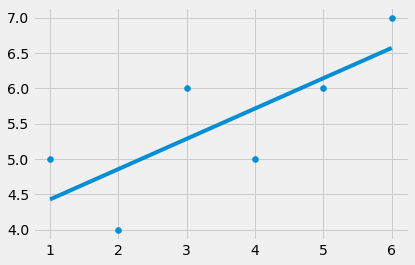

In [4]:
from matplotlib import style

style.use('fivethirtyeight')

def best_fit_slope_and_intercept(xs,ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) / 
          ((mean(xs) * mean(xs)) - mean(xs*xs)) )
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

regression_line = [(m*x) + b for x in xs]


plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()

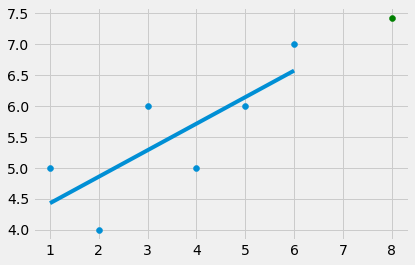

In [5]:
predict_x = 8
predict_y = (m * predict_x) + b

plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y, color='g')
plt.plot(xs, regression_line)
plt.show()

# R Squared Theory & Programming

In [6]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig) ** 2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    
    return 1 - (squared_error_regr / squared_error_y_mean)

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.5844155844155845


# Testing Assumptions

In [7]:
import random

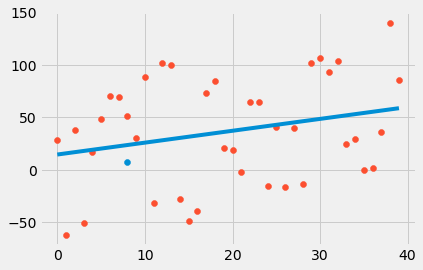

In [8]:
def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation =='pos':
            val += step
        elif correlation and correlation =='neg':
            val -= step
    xs = [i for i in range(len(ys))]
        
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

xs, ys = create_dataset(40, 80, 2, correlation='pos')

m, b = best_fit_slope_and_intercept(xs,ys)

regression_line = [(m*x) + b for x in xs]


plt.scatter(predict_x, predict_y)
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()